## Data Pre-proccessing

In [240]:
# Importing important libraries
import pandas as pd, numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
#Load the data
health =  pd.read_csv(r"C:\Users\Student 95\Documents\Health\Project 2\Health care diabetes.csv")

In [49]:
#Check the nature of the datasets
print(health.shape)

(768, 9)


In [50]:
#View the the first 10 instances
health.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [51]:
#Column wise null values check
health.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [52]:
#For the entire DataFrame null values check
health.isnull().any().any()

False

#### We obesrve that the data contains no null values, however let's do the value counts to see the nomalies of each variable

In [53]:
#The mean of the variable 'Insulin'
print(health['Insulin'].mean(), health['Insulin'].median())

79.79947916666667 30.5


In [54]:
#### Describe the data to get the various statistics excluding the 'missing values' for the entire DataFrame 
health.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [56]:
#Check the value counts for each of the indexes
for col in health.columns:
    print('The value counts in '+col+' are:', health[col].value_counts())

The value counts in Pregnancies are: 1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
The value counts in Glucose are: 100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Glucose, Length: 136, dtype: int64
The value counts in BloodPressure are: 70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
94      6
85      6
48      5
44      4
96      4
110     3
100     3
98      3
106     3
108     2
104     2
30      2
55      2
46      2
40      1
38      1
24      1
95      1
61      1
102     1
114     1
122     1
Name: BloodPressure, dtype: int64
The value counts in SkinThickness 

We can see that there are 0 values in columns(BloodPressure, SkinThickness, Insulin, BMI) which is anomaly, as this is 
the first thing for every patients prior the doctor's consultation.

#### Performing a value_count plot below for Glucose. We can see zeros about six of them.

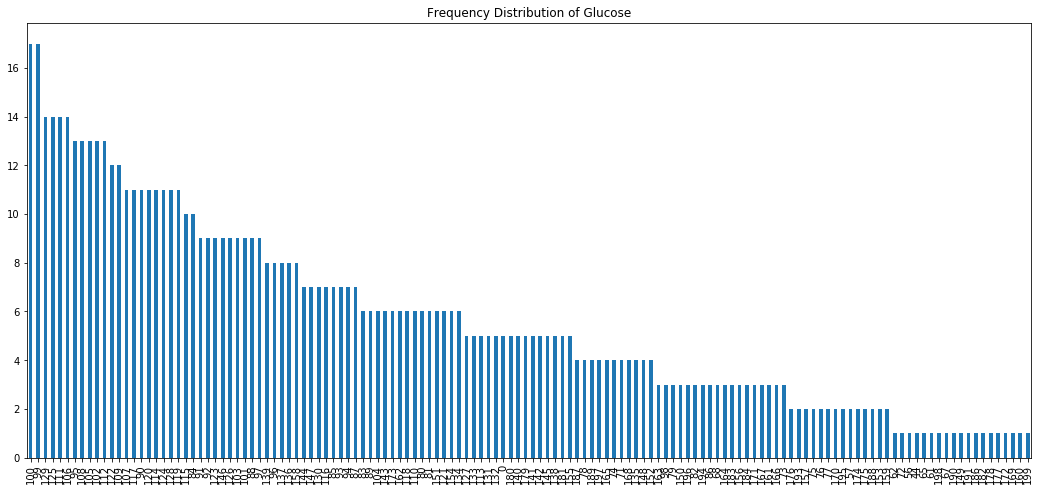

In [57]:
# We further do a histogram plot (value_counts) for Glucose column to see if contain any 0 values.

plt.figure(figsize=(18,8))
health['Glucose'].value_counts().plot.bar(title='Frequency Distribution of Glucose')

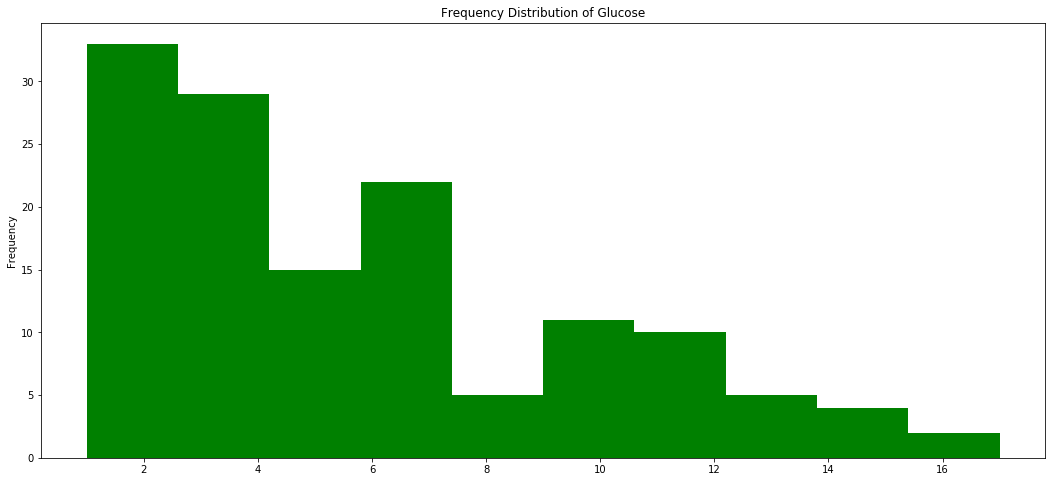

In [58]:
#The distribution column of the Glucose shows a positively skewed distribution. A large number of values occurs on the left
#with the fewer number of data values on the right side.
plt.figure(figsize=(18,8))
health['Glucose'].value_counts().plot.hist(title='Frequency Distribution of Glucose', color='g')

In [59]:
# Data type conversions
health['BMI'] = health['BMI'].astype('int64')
health['DiabetesPedigreeFunction'] = health['DiabetesPedigreeFunction'].astype('int64')

In [60]:
# Show new data types
health.dtypes

Pregnancies                 int64
Glucose                     int64
BloodPressure               int64
SkinThickness               int64
Insulin                     int64
BMI                         int64
DiabetesPedigreeFunction    int64
Age                         int64
Outcome                     int64
dtype: object

In [61]:
health.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33,0,50,1
1,1,85,66,29,0,26,0,31,0
2,8,183,64,0,0,23,0,32,1
3,1,89,66,23,94,28,0,21,0
4,0,137,40,35,168,43,2,33,1


In [62]:
col_with_0 = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']   

#### Visually explore these columns using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF36D739C8>,
      dtype=object)

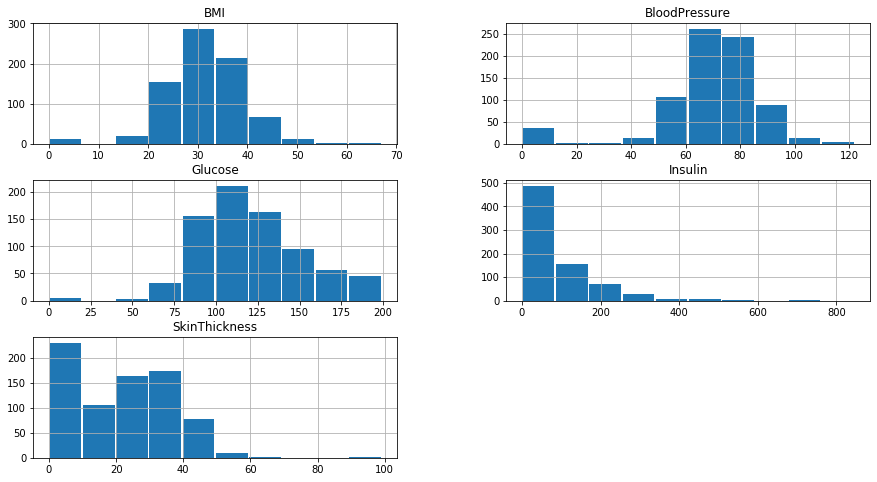

In [63]:
# Exploring the variables using histogram
health.hist(column=col_with_0, rwidth=0.95, figsize=(15,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF381CA588>,
      dtype=object)

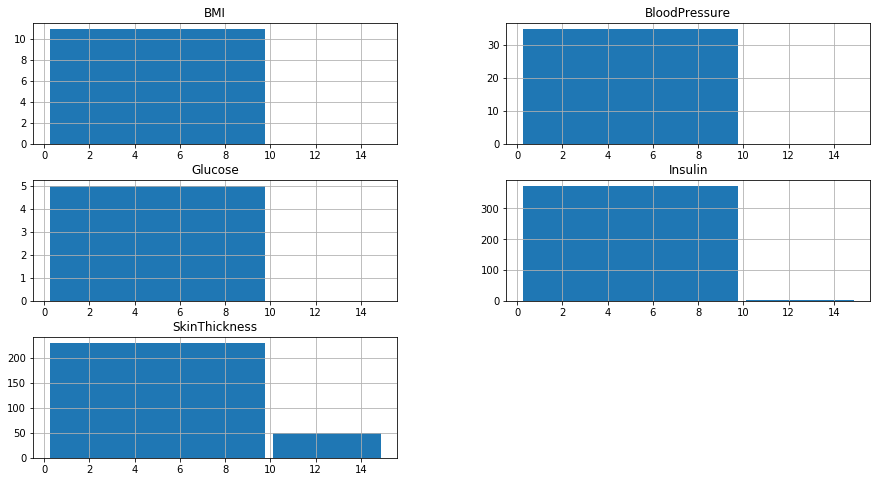

In [64]:
# We set an appropriate range to observe the 0 value counts
health.hist(column=col_with_0, bins=[0,10,15], rwidth=0.95, figsize=(15,8))

In [65]:
# Replace the all the zero values with NaN
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
health[cols] = health[cols].replace(0, np.nan)

In [66]:
health

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.0,0,50,1
1,1,85.0,66.0,29.0,NaN,26.0,0,31,0
2,8,183.0,64.0,NaN,NaN,23.0,0,32,1
3,1,89.0,66.0,23.0,94.0,28.0,0,21,0
4,0,137.0,40.0,35.0,168.0,43.0,2,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.0,0,63,0
764,2,122.0,70.0,27.0,NaN,36.0,0,27,0
765,5,121.0,72.0,23.0,112.0,26.0,0,30,0
766,1,126.0,60.0,NaN,NaN,30.0,0,47,1


In [ ]:
#### Treat the missing values with the pandas method using the mean.

In [67]:
health.fillna(health.median())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.0,0,50,1
1,1,85.0,66.0,29.0,125.0,26.0,0,31,0
2,8,183.0,64.0,29.0,125.0,23.0,0,32,1
3,1,89.0,66.0,23.0,94.0,28.0,0,21,0
4,0,137.0,40.0,35.0,168.0,43.0,2,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.0,0,63,0
764,2,122.0,70.0,27.0,125.0,36.0,0,27,0
765,5,121.0,72.0,23.0,112.0,26.0,0,30,0
766,1,126.0,60.0,29.0,125.0,30.0,0,47,1


In [68]:
health = health.fillna(health.median())

In [69]:
health.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction      int64
Age                           int64
Outcome                       int64
dtype: object

In [70]:
health['Pregnancies']=health['Pregnancies'].astype('int64')

## Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF38935B48>,
      dtype=object)

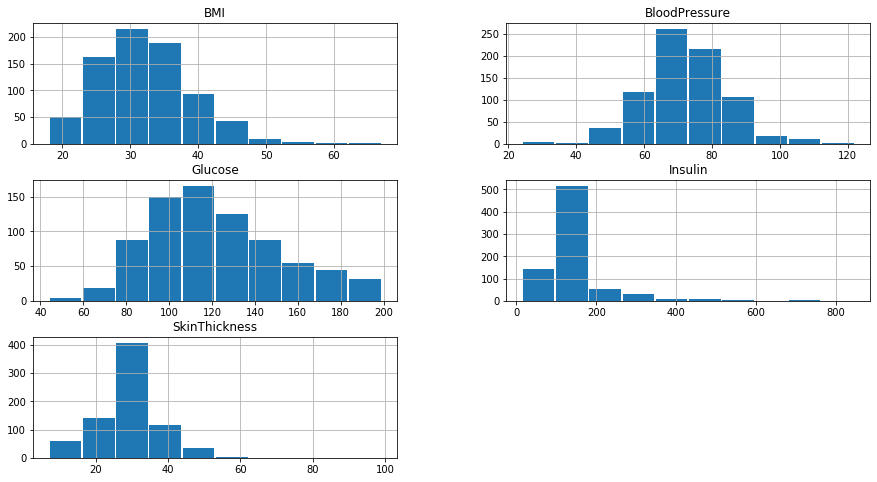

In [71]:
health.hist(column=cols, rwidth=0.95, figsize=(15,8))

#### Univariate Analysis

Text(0.5, 1.0, 'Glucose Analysis')

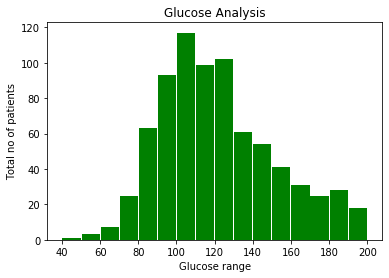

In [72]:
# Plotting the Histogram barplot to compare the frequency distribution of each indexes.
# We also create a range to compare and analyse different distribution.

bins=[40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]

plt.hist(health['Glucose'], rwidth=0.95, bins=bins, color='g')
plt.xlabel('Glucose range')
plt.ylabel('Total no of patients')
plt.title('Glucose Analysis')

#### The nomal glucose level is between 80 and 115. If its above 115 you are considered as diabetic, the outcome is '1'.

We can observe above that in 120 glucose range there are more than 100 patients considered possible diabetic. The maximum 
number of patients with no diabetic is almost 120. The number of patients who are normal are more the number of pre-diabetic 
or diabetic patients.

Text(0, 0.5, 'BloodPressure range')

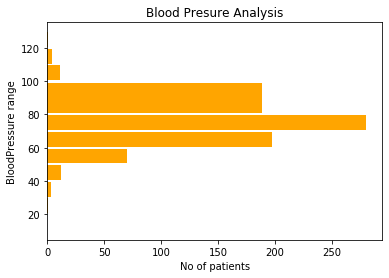

In [73]:
bin_BP=[10,20,30,40,50,60,70,80,100,110,120,130]

plt.hist(health['BloodPressure'], bins=bin_BP, rwidth=0.9, color='orange', orientation='horizontal')
plt.title('Blood Presure Analysis')
plt.xlabel('No of patients')

plt.ylabel('BloodPressure range')

In [74]:
# Check the new data type
health.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction      int64
Age                           int64
Outcome                       int64
dtype: object

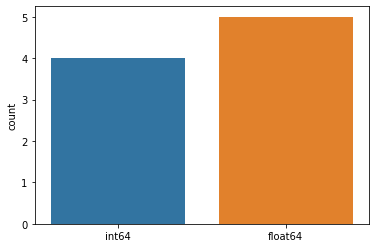

In [75]:
sns.countplot(health.dtypes.map(str))
plt.show()

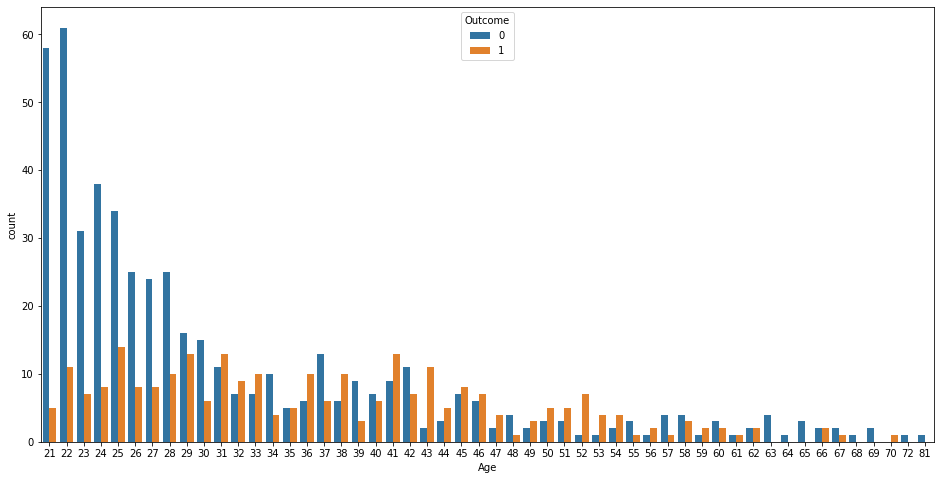

In [76]:
from matplotlib.pyplot import figure
figure(figsize=(16,8))
sns.countplot(data=health, x='Age', hue='Outcome')

We note in the above age count plot that:
+ The age between 21 to 30 have the more patients without diabetes compared to the patients with diabetes. However, we 
observe that most of our data is distributed between this range of age. If you are in this age range you are more likely to
have no diabetes.
+ The age between 31 to 54 have more diabetic patients compared to non diabetic, when you grow older you are more likely to
have diabetes. One of the factors causing this may be the less activities and excercises compared to the age between 21-30.
+ The older patients from age 54 up to the age of 81 which are less populated, they are more likey to have diabetes.

#### Multivariate Analysis

C:\Users\Student 95\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


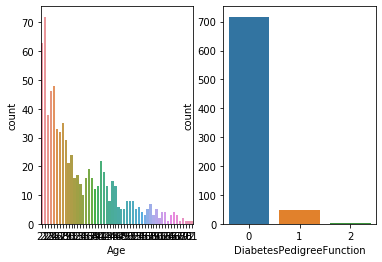

<Figure size 864x432 with 0 Axes>

In [77]:
fig, ax =plt.subplots(1,2)
figure(figsize=(12,6))
sns.countplot(health['Age'],  ax=ax[0])
sns.countplot(health['DiabetesPedigreeFunction'], ax=ax[1])
fig.show()

In [78]:
health=health.astype('int64')

In [79]:
health.dtypes

Pregnancies                 int64
Glucose                     int64
BloodPressure               int64
SkinThickness               int64
Insulin                     int64
BMI                         int64
DiabetesPedigreeFunction    int64
Age                         int64
Outcome                     int64
dtype: object

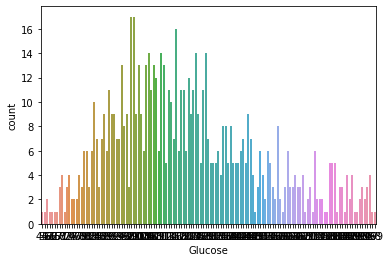

In [80]:
sns.countplot(health['Glucose'])

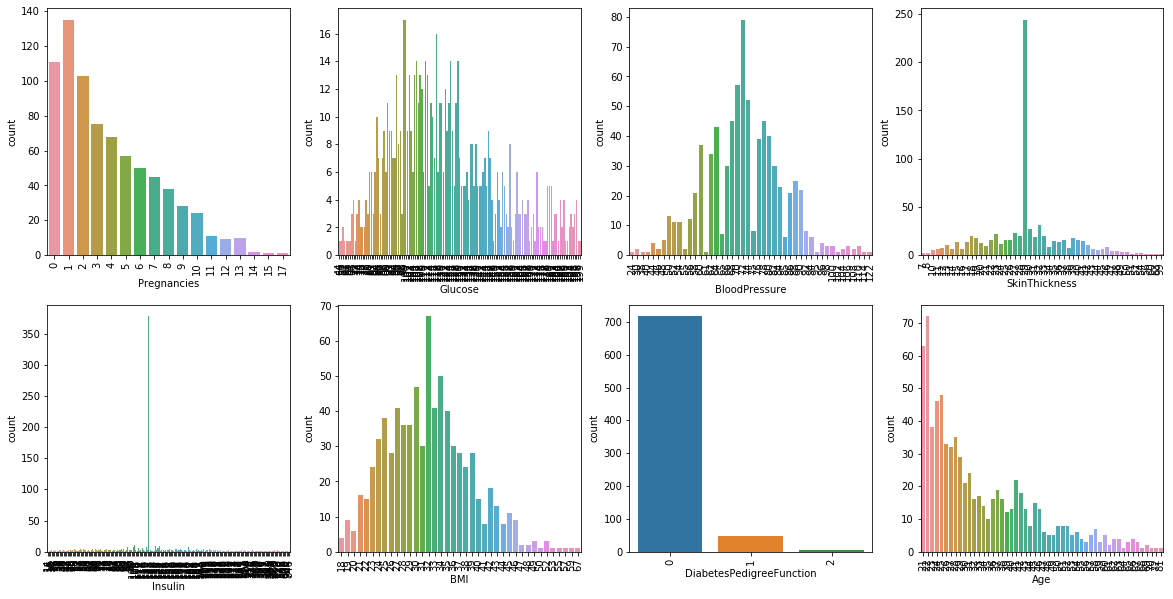

In [81]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(health, ax.flatten()):
    sns.countplot(health[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [82]:
health['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

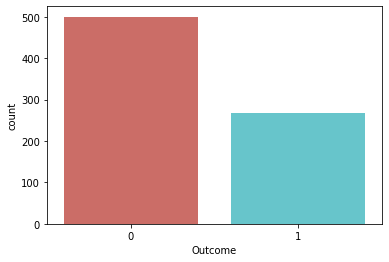

<Figure size 432x288 with 0 Axes>

In [83]:
sns.countplot(data=health, x='Outcome', palette='hls')
plt.show()
plt.savefig('count_plot')

### This is an Imbalanced Data
+ Looking at the count plot above we can see that we are dealing with an imbalanced data. Which refers to a problem with 
classification problems where the classes are not represented equally.
+ This is an imbalanced dataset and the ratio of class-1 to class-0 instances is 500:268 or more concisely 2:1.

### Techniques we can use to combat the imbalanced training data:
#### 1.Collect More Data
+ The collection of more data is the another good way of fixing the imbalanced data. The large dataset might expose a
different and perhaps more balanced perspective on the classes.

#### 2.Change the Performance Metric
+ Accuracy is not the metrics to use when dealing with an imbalanced dataset, this metric is misleading.
+ There are metrics that have been designed to tell us a more truthful story when working with an imbalanced dataset.
+ The following performance measures can give more insight into the accuracy of the model than the traditional  
classification accuracy:
    
##### Confusion Matrix: 
+ A breakdown of predictions into a table showing correct predictions (the diagonal) and the types of incorrect 
 predictions made (what classes incorrect predictions were assigned).
##### Precision: 
+ A measure of a classifiers exactness.
##### Recall:
+ A measure of a classifiers completeness
   ##### F1 Score (or F-score): 
+ A weighted average of precision and recall.
   
    We can also look at the following:
##### ROC Curves: 
+ Like precision and recall, accuracy is divided into sensitivity and specificity and models can be chosen
based on the balance thresholds of these values.
            
#### 3. Try Different Algorithms  
+ Using one favorite algorithm on every problem is not adviceable. Using different algorithms on a problem will give 
different results and accuracy. Random Forest and Decision tree algorithms they often perform well.

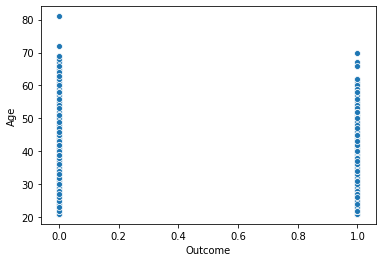

In [84]:
sns.scatterplot(y=health['Age'], x=health['Outcome']);

#### Feature-Feature Relationships
+ We explore the relationship between the attributes.

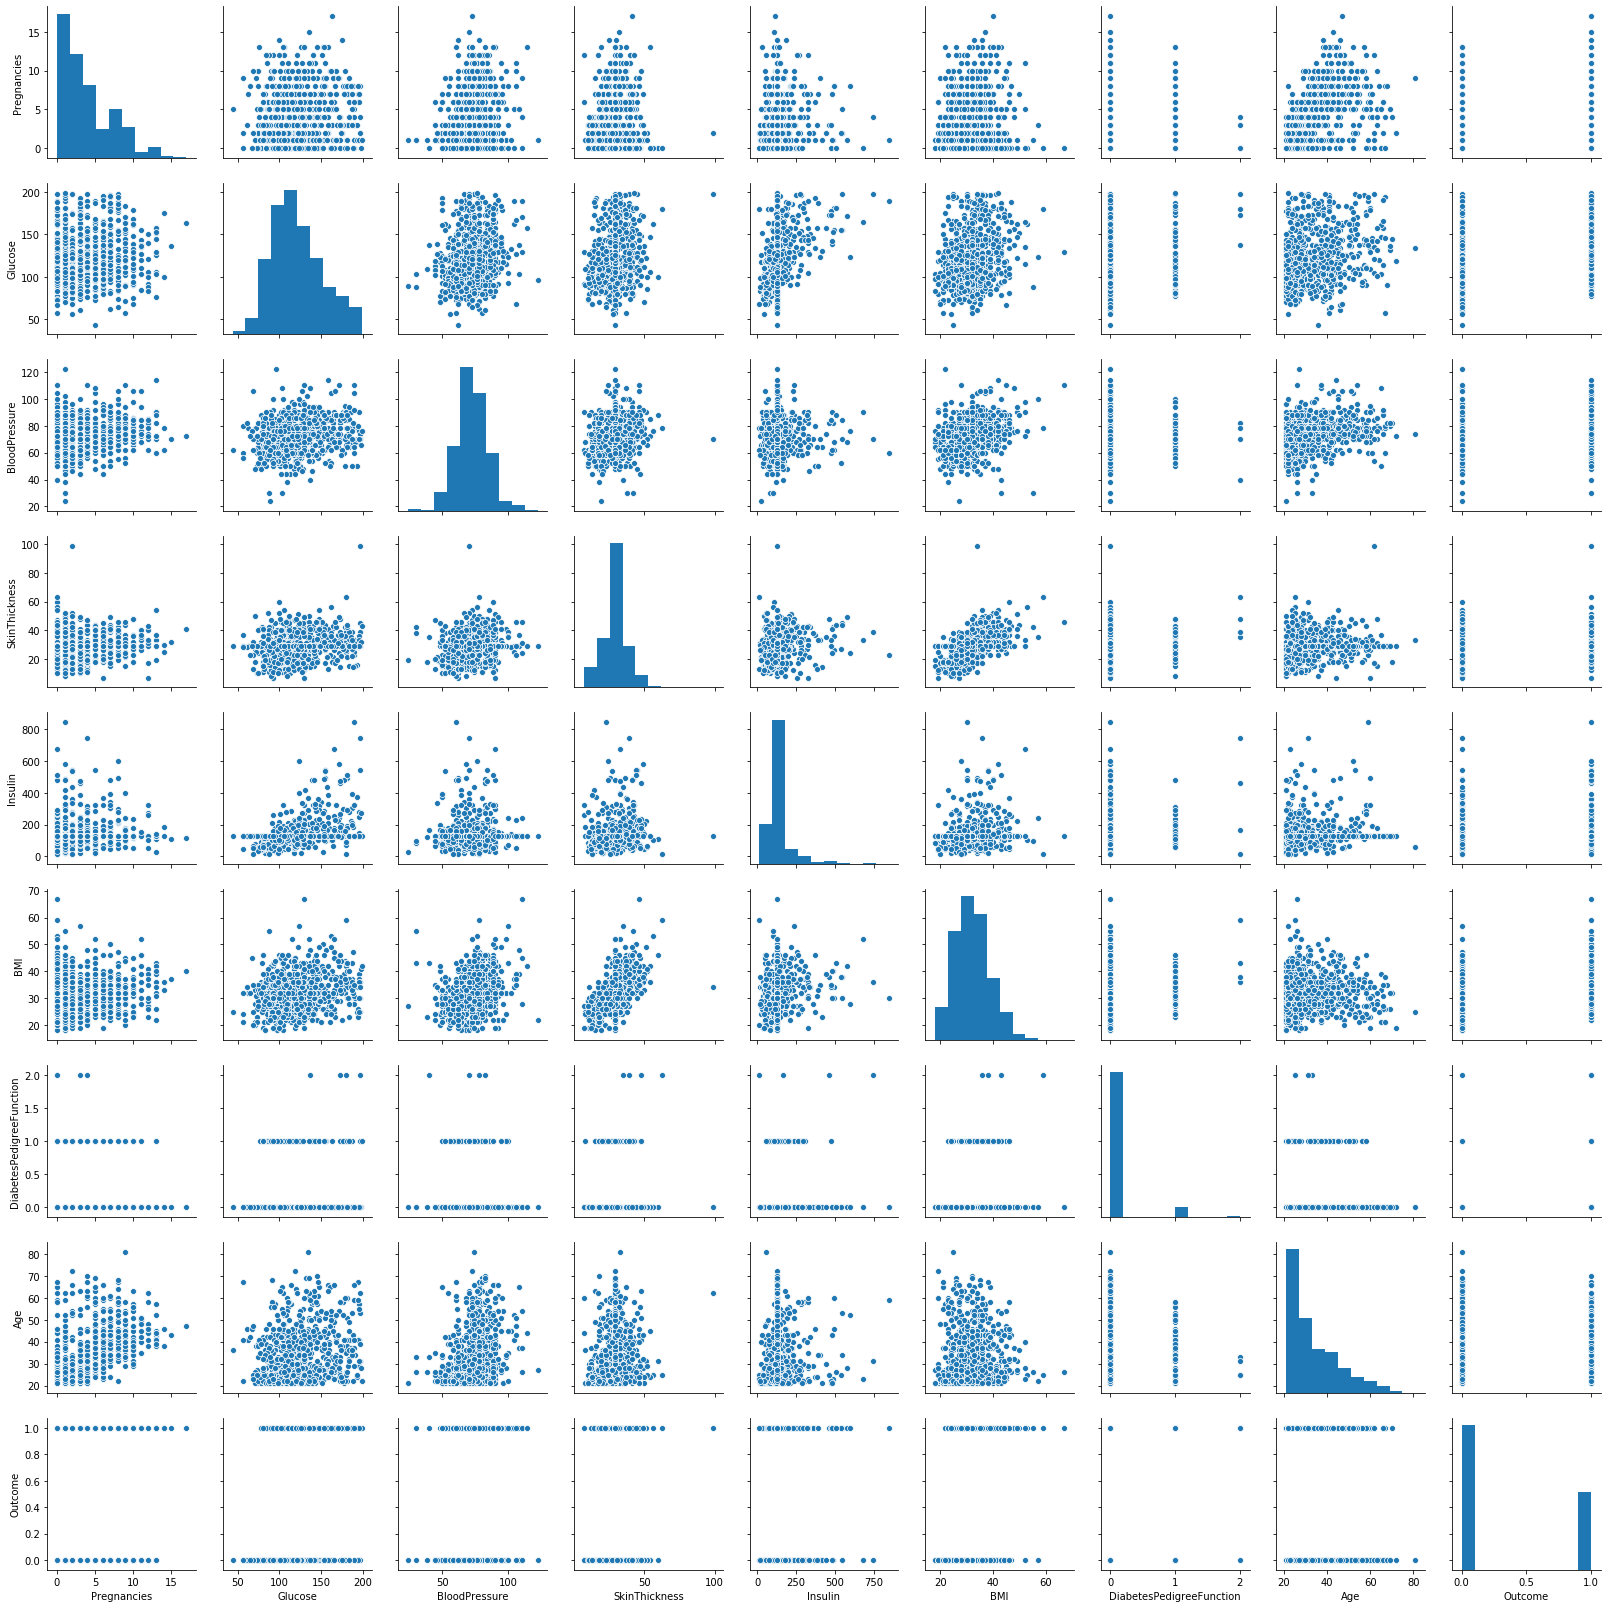

In [85]:
# The scatter charts between the pair of variables to understand the relationship.
sns.pairplot(health)

Looking at the pair plot above we can see that we have the positive correlation between BMI and SkinThickness, no correlation
between Glucose and SkinThickness. Age have the strong positive correlation with bloodPressure.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF3D989908>,
      dtype=object)

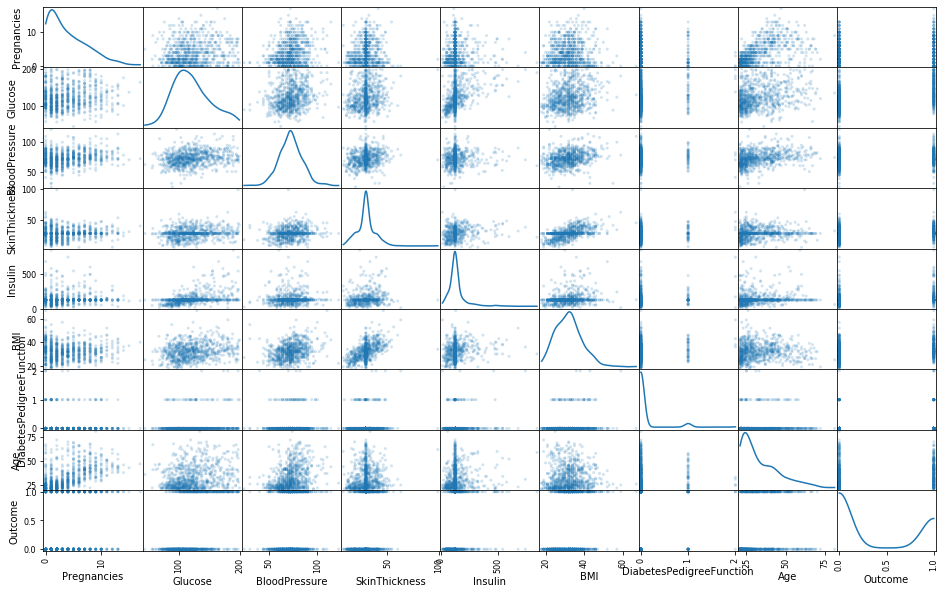

In [86]:
from pandas.plotting import scatter_matrix
scatter_matrix(health, alpha=0.2, figsize=(16, 10), diagonal='kde')

+ Looking at the matrix of scatter plots of all attributes versus all attributes. We can see possible correlation between the 
BloodPressure and BMI and another possible relationship between Age and Pregnancies.

## Correlation Analysis and Feature Selection

In [87]:
#Important libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = health.iloc[:,0:8]
y = health.iloc[:,-1]

In [88]:
#Apply SeleckKBest class to extarct top 6 best features
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X,y)

In [89]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [90]:
#Concat two DataFrames for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['col','Score']

The feature with highest scores will be much more correlated to the 'Outcome' feature that we have in our dataset.
Below if the the score is high, then the more important that feature is. We can see that the Insulin and Glucose have the
highest scores, that means if the Glucose and Insulin increases the Outcome of patients with diabetes also increases.

In [91]:
featureScores

,col,Score
0,Pregnancies,111.519691
1,Glucose,1418.442397
2,BloodPressure,42.582507
3,SkinThickness,94.025335
4,Insulin,1689.711075
5,BMI,109.575894
6,DiabetesPedigreeFunction,13.127123
7,Age,181.303689


In [92]:
# Print the 6 best features
print(featureScores.nlargest(6,'Score'))

             col        Score
4        Insulin  1689.711075
1        Glucose  1418.442397
7            Age   181.303689
0    Pregnancies   111.519691
5            BMI   109.575894
3  SkinThickness    94.025335


Above we can observe the top six features that are correlated to the Outcome variable.

#### Correlation Matrix with Heatmap

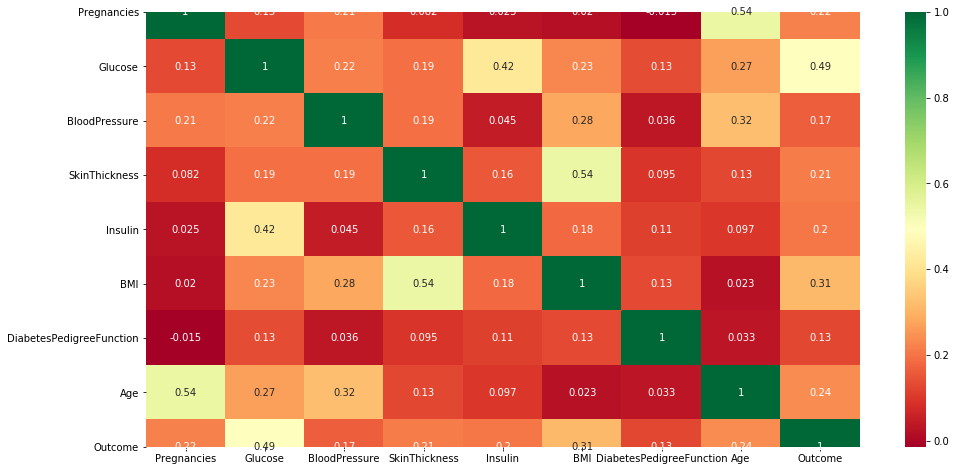

In [93]:
#The correlation of each feauture in the dataset
corrmat = health.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,8))
#We plot the heatmap
sns.heatmap(health[top_corr_features].corr(), annot=True, cmap='RdYlGn')

+ Here we can infer that "Outcome" has the strong positive correlation with "Glucose" whereas it almost has no correlation 
  with DiabetesPedigreeFunction.
+ "SkinThickness" and "Insulin" has almost no correlation with "Pregnancies".
+ There is a strong correlation between independent features which are "Insulin and Glucose", "BMI and SkinThickness", "Age and
  Pregnancies".

#### Correlation matrix with heatmap also gives a clear correlation between independent features, which is very great.

In [94]:
# We can drop this two features since they are not correlated with target variable(Outcome)
health.drop(['BloodPressure','DiabetesPedigreeFunction'], axis=1, inplace=True)

In [95]:
health.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,35,125,33,50,1
1,1,85,29,125,26,31,0
2,8,183,29,125,23,32,1
3,1,89,23,94,28,21,0
4,0,137,35,168,43,33,1


## Data Modeling

#### To medel this dataset I will use logistic Regression

#### Logistic Regression

In statistics, the logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick.

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). ... Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [96]:
#split the dataset in features and target varaible
X = health.drop("Outcome", axis=1)
y = health["Outcome"]

#### Split the datset
To understand the model perfomance we split the datasets into training set and test set.

In [97]:
# Split X and y into training and testing set.
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

The 75% of the data will be used for model training and 25% for model testing.

#### Model Development and predictions
+ Import the Logistc Regressiom module and create a Logistic Regressin classifier object using LogisticRegression() unction.

In [99]:
# import the class
from sklearn.linear_model import LogisticRegression

In [100]:
#instantiate the model
logreg = LogisticRegression()

#fit the model with train data
logreg.fit(X_train, y_train)

#fit the model with predictor test data(X_test)
y_pred = logreg.predict(X_test)

C:\Users\Student 95\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Model Evaluation using Confusion Matrix

#### Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) 
on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm. It 
is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one.

In [101]:
# import the metrics
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
cf_matrix

array([[117,  13],
       [ 29,  33]], dtype=int64)

The dimension of this matrix is 2*2 because this model is binary classification. We have two classes 0 and 1.
Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.

There were 117 True Positives, patients with diabetes that were correctly classified and 33 True Negatives, patients without
diabetes that were correctly classified. However, the algorithm misclassified 29 patients that did have a diabetes by sayinng 
they did not (False Negative) and algorithm misclassified 13 patients that did not have diabetes by saying that they
did (False Positive)

#### Visual Confinsion Matrix using Heatmap
We visualize the results of the model in the form of the confusion matrix using matplotlib and seaborn.

Text(0.5, 257.44, 'Predicted label')

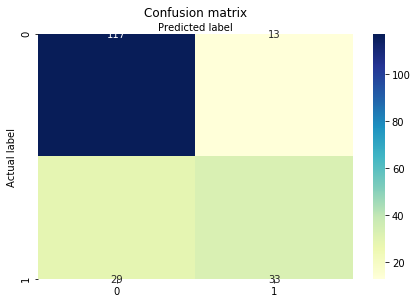

In [102]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Evaluation Matrix of Confusion Matrix
+ Accuracy, Precision, and Recall

    + Accuracy is the proportion of true results among the total number of cases examined.
    + Precision gives the proportion of predicted Positives that are truly Positive.
    + Recall measures the proportion of actual Positives that were correctly classified.

In [103]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.78125
Precision: 0.717391304347826
Recall: 0.532258064516129


We got the classification rate of 78% considered as the good accuracy. This are true results among the total number of cases 
examined.

The model got the 72% accururateness in predicting the patients with diabetes.

Reacall: This are the results of the patients predicted to have diabetes and Logistic regression can capture 53% of patients
    with diabetes.


## Comparing the KNN Algorithm with DecisionTree, Random Forest, and Logistic Regression classifier.

#### We use the pipeline in sklearn

In [104]:
# Import the libraries (pipeline and models)
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [105]:
pipeline_dt=Pipeline([('dt_classifier',DecisionTreeClassifier(random_state=0))])

In [106]:
pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

In [107]:
pipeline_knn=Pipeline([('kn_classifier',KNeighborsClassifier())])

In [108]:
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression())])

In [109]:
#Make the list of pipelines
pipelines = [pipeline_dt,pipeline_rf,pipeline_knn,pipeline_lr]

In [110]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [111]:
#Dictionery of pipelines and classifier type for ease of reference
pipe_dict = {0: 'Decision Tree', 1: 'RandomForest', 2: 'KNeighbors', 3:'Logistic Regression'}

#Fit the pipilines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

C:\Users\Student 95\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Student 95\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [112]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Decision Tree Test Accuracy: 0.7604166666666666
RandomForest Test Accuracy: 0.7447916666666666
KNeighbors Test Accuracy: 0.765625
Logistic Regression Test Accuracy: 0.78125


In [113]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))         

Classifier with best accuracy:Logistic Regression


Logistic Regression is the best classifier compared with other algorithms, with the good accuracy of 78%. This is the
proportion of true results among the total number of cases examined.

### The Confusion Matrix for each Agorithm

#### Decision Tree Confusion Matrix

In [114]:
y_pred_0 = pipeline_dt.predict(X_test)

In [115]:
dt_cnf_matrix=metrics.confusion_matrix(y_test,y_pred_0)
dt_cnf_matrix

array([[106,  24],
       [ 22,  40]], dtype=int64)

#### Random Forest Confusion Matrix

In [116]:
y_pred_1 = pipeline_rf.predict(X_test)

In [117]:
rf_cnf_matrix=metrics.confusion_matrix(y_test,y_pred_1)
rf_cnf_matrix

array([[111,  19],
       [ 30,  32]], dtype=int64)

#### KNeighborsClassifier Confusion Matrix

In [118]:
y_pred_3 = pipeline_knn.predict(X_test)

In [119]:
knn_cnf_matrix=metrics.confusion_matrix(y_test,y_pred_3)
knn_cnf_matrix

array([[113,  17],
       [ 28,  34]], dtype=int64)

#### LogisticRegression Confusion Matrix

In [120]:
y_pred_4=pipeline_lr.predict(X_test)

In [121]:
lr_cnf_matrix=metrics.confusion_matrix(y_test,y_pred_4)
lr_cnf_matrix

array([[117,  13],
       [ 29,  33]], dtype=int64)

Looking at the results the KNN correctly classified 113 patients with diabetes and 34 patients without diabetes, better TP
compared to the Decision Tree and Random Forest. Decision Tree is the only classifier with the better number of True Negatives
compared to other classifiers. KNN did not do better compared to the Logistic Regression which got 117 correctly 
classified patients with diabetes.

If identifying patients without diabetes was more important in this data we would choose Decision tree Classifier. 
Also if identifying patients with diabetes was more important in this data, we would choose Logistic regression.

#### The Logistic Regression or KNeighbors Classifier are better choices over Random Forest and Decision Tree Classifier

However the two Confusion Matric of Logistic Regression and KNeighbors Classifier make it hard to choose which machine
learning method is the better fit for this data. They differ with a small margin.
+ We need to use more sophisticated metrics, like Sensitivity, Specificity, ROC and AUC that can help us make a decision.

### Sensitivity and Specificity
+ Sensitivity tells us what percentage of patients with diabetes were correctlly identified.
+ Specificity tells us what percentage of patients without diabetes were correctly identified.

#### Sensitivity and Specificity of Random Forest and Logistic Regression

In [151]:
# For KNeighbors
sensitivity, specificity= [113/(113+28), 34/(34+17)]
print("sensitivity:", sensitivity)
print("specificity:", specificity)

sensitivity: 0.8014184397163121
specificity: 0.6666666666666666


In [123]:
# For Logistic Regression
sensitivity, specificity= [117/(117+29), 33/(33+13)]
print("sensitivity:", sensitivity)
print("specificity:", specificity)

sensitivity: 0.8013698630136986
specificity: 0.717391304347826


Since identifying patients with diabetes and without diabetes were more important. We choose Logistic Regression as the best 
classifier for both classifications, beacuse of its good sensitivity and specificity compared to the KNeighbors classifier.
We take note that they have the same parcentage of sensitivity because Logistic Regression have the high number of errors of 
True Negative compared to KNeighbors.

### AUC Curve and Area Under ROC Curve in Machine Learning 
+ ROC or Receiver Operating Characteristic curve is used to evaluate classification models in Machine Learing.
+ ROC or Receiver Operating Characteristic plot is used to visualise the performance of a binary classifier. It gives us the
trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) at different classification thresholds.
+ It is nothing but a graph dispalying the performance of a classification model.
+ It is very popular model to measure the accuracy of a classification model.

## Lets try and Improve the performance of Random Classifier by thresholding

### ROC Curve of the Random Forest Classifier vs. Perfect Classifier(default threshold(0.5))

In [204]:
# Import the roc libraries and use roc_curve() to get the threshold, TPR, and FPR
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, pipeline_rf.predict_proba(X_test)[:,1])

The fpr, tpr and threshold arrays:

In [205]:
fpr

array([0.        , 0.00769231, 0.02307692, 0.06153846, 0.10769231,
       0.14615385, 0.21538462, 0.26923077, 0.35384615, 0.46153846,
       0.66923077, 1.        ])

In [206]:
tpr

array([0.        , 0.08064516, 0.20967742, 0.29032258, 0.43548387,
       0.51612903, 0.69354839, 0.79032258, 0.88709677, 0.9516129 ,
       0.98387097, 1.        ])

In [207]:
thresholds

array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

In [208]:
# For AUC we use roc_auc_score() function for ROC
rf_roc_auc1 = roc_auc_score(y_test, pipeline_rf.predict(X_test))

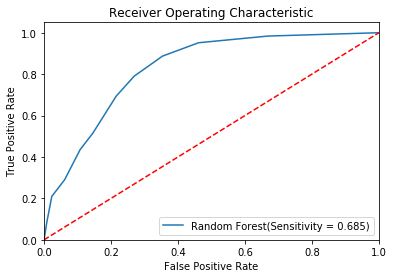

In [209]:
#Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, label='Random Forest(Sensitivity = %0.3f)' % rf_roc_auc1)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Tuning the threshold value to build a classifier model with more desired output.

In [210]:
# The predicted probabilities of class 1(diabetes patients)
y_pred_11 = pipeline_rf.predict_proba(X_test)[:,1]
y_pred_11 = y_pred_11.reshape(1,-1)
y_pred_11

array([[0.9, 0.3, 0. , 0.5, 0.1, 0. , 0.6, 0.8, 0.1, 0.3, 0.5, 0.7, 0.1,
        0. , 0.7, 0.7, 1. , 0. , 0.5, 0.3, 0.7, 0.1, 0. , 0.3, 0. , 0.2,
        0.1, 0.7, 0.1, 0.2, 0.5, 0. , 0.2, 0.2, 0.1, 1. , 0.5, 0.1, 0.1,
        0.8, 0.1, 0.1, 0. , 0.9, 0.7, 0. , 0.3, 0.3, 0.2, 0.6, 0.4, 0.2,
        0.6, 0.7, 0.4, 0. , 0.2, 0.3, 0.2, 0.5, 0.8, 0.9, 0. , 0.4, 0.9,
        0.2, 1. , 0.1, 0.6, 0.6, 0. , 0. , 0.1, 0.8, 0.9, 0.5, 0.2, 0.6,
        0.6, 0.3, 0.2, 0.6, 0.1, 0. , 0.1, 0.4, 0. , 0.2, 0.8, 0.1, 0.4,
        0.5, 0. , 0. , 0.8, 0.3, 0.4, 0.2, 0.3, 0.4, 0.4, 0. , 0. , 0. ,
        0.3, 0.8, 0. , 0.5, 0. , 0.4, 0. , 0.7, 0.8, 0.5, 1. , 1. , 0.1,
        0.5, 0. , 0.7, 0.5, 0.2, 0. , 0. , 0.3, 0. , 0.2, 0.6, 0.5, 0.9,
        0.5, 0.2, 0. , 0.9, 0.4, 0.5, 0.3, 0.5, 0.5, 0.1, 0.1, 0.8, 0. ,
        0.1, 0.9, 0. , 0.1, 0. , 0. , 0.3, 0.1, 0.5, 0.1, 0.1, 0.7, 0.1,
        0.7, 0. , 0.6, 0.7, 0.4, 0.5, 0. , 0.1, 1. , 0.2, 0.4, 0. , 0.3,
        0.8, 0. , 0. , 0.7, 0.3, 0.7, 0. , 0. , 0. 

In [211]:
# Set the threshold at 0.35
from sklearn.preprocessing import binarize
y_pred_11 = binarize(y_pred_11,0.6)[0]
y_pred_11

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0.])

In [212]:
#Converting the array from float data type to integer data type
y_pred_11 = y_pred_11.astype(int)
y_pred_11

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [213]:
rf_cnf_matrix1 = metrics.confusion_matrix(y_test, y_pred_11)
rf_cnf_matrix1

array([[116,  14],
       [ 35,  27]], dtype=int64)

+ Note: Here
    + True Positive is 116
    + True Negative is 27
    + False Positve is 14
    + False Negative is 35
    
We can clearly see the classifier has improved. Compare with the previous Confusion Matrix given below:    

In [214]:
rf_cnf_matrix

array([[111,  19],
       [ 30,  32]], dtype=int64)

In [215]:
# Other performance matrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_11))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       130
           1       0.66      0.44      0.52        62

    accuracy                           0.74       192
   macro avg       0.71      0.66      0.67       192
weighted avg       0.73      0.74      0.73       192



We compare the performance metrics (above) at threshold 0.6 to the performance metrics at default threshold (below).

In [216]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       130
           1       0.63      0.52      0.57        62

    accuracy                           0.74       192
   macro avg       0.71      0.68      0.69       192
weighted avg       0.74      0.74      0.74       192



We can see an improvement on the precision of the threshold classifier with 66% on classification patients with diabetes.
Whereas the default classifier got 63% of patients with diabetes.

We observe how sensitity changes with threshold, we plot the ROC Curve again.

In [217]:
rf_roc_auc2 = roc_auc_score(y_test, y_pred_11)

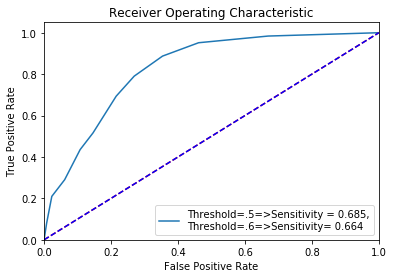

In [218]:
plt.figure()
plt.plot(fpr, tpr, label='Threshold=.5=>Sensitivity = %0.3f,\nThreshold=.6=>Sensitivity= %0.3f' % (rf_roc_auc1,rf_roc_auc2))
plt.plot([0,1], [0,1], 'r--')
plt.plot([0,1], [0,1], 'b--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="best")
plt.savefig('Log_ROC')         
plt.show()

Looking at the sensitivity for the threshold which is slightly below the default threshold, this is because there was an 
increase of the False Negative

### ROC Curve for Logistic Regression Classifier

In [220]:
# We use roc_curve() to get the threshold, TPR and FPR
fpr, tpr, thresholds = roc_curve(y_test, pipeline_lr.predict_proba(X_test)[:,1])

In [221]:
fpr

array([0.        , 0.        , 0.00769231, 0.00769231, 0.01538462,
       0.01538462, 0.02307692, 0.02307692, 0.03076923, 0.03076923,
       0.03846154, 0.03846154, 0.04615385, 0.04615385, 0.09230769,
       0.09230769, 0.11538462, 0.11538462, 0.14615385, 0.14615385,
       0.15384615, 0.15384615, 0.16923077, 0.16923077, 0.18461538,
       0.18461538, 0.23076923, 0.23076923, 0.26153846, 0.26153846,
       0.26923077, 0.26923077, 0.28461538, 0.28461538, 0.29230769,
       0.29230769, 0.3       , 0.3       , 0.33076923, 0.33076923,
       0.36153846, 0.36153846, 0.4       , 0.4       , 0.42307692,
       0.42307692, 0.6       , 0.6       , 1.        ])

In [222]:
tpr

array([0.        , 0.01612903, 0.01612903, 0.03225806, 0.03225806,
       0.09677419, 0.09677419, 0.14516129, 0.14516129, 0.20967742,
       0.20967742, 0.30645161, 0.30645161, 0.5       , 0.5       ,
       0.53225806, 0.53225806, 0.5483871 , 0.5483871 , 0.62903226,
       0.62903226, 0.66129032, 0.66129032, 0.67741935, 0.67741935,
       0.72580645, 0.72580645, 0.74193548, 0.74193548, 0.77419355,
       0.77419355, 0.79032258, 0.79032258, 0.82258065, 0.82258065,
       0.85483871, 0.85483871, 0.87096774, 0.87096774, 0.88709677,
       0.88709677, 0.93548387, 0.93548387, 0.96774194, 0.96774194,
       0.98387097, 0.98387097, 1.        , 1.        ])

In [224]:
thresholds

array([1.87762711, 0.87762711, 0.84756479, 0.84581576, 0.83167532,
       0.79694471, 0.79001908, 0.76563703, 0.7629862 , 0.73752615,
       0.73174881, 0.67784585, 0.67453393, 0.57262224, 0.53914199,
       0.51299891, 0.47509267, 0.46972238, 0.42497604, 0.40787803,
       0.40573184, 0.39508921, 0.38739914, 0.38666725, 0.37073711,
       0.35664099, 0.34075897, 0.34054954, 0.32891218, 0.32849133,
       0.32798178, 0.32458323, 0.31984386, 0.31845246, 0.31613832,
       0.30639281, 0.3005044 , 0.29959547, 0.28975672, 0.28950543,
       0.27715507, 0.27034644, 0.25198622, 0.25073455, 0.24633432,
       0.24490069, 0.1934251 , 0.19252222, 0.04383366])

In [226]:
# For AUC we use roc_auc_score() function for ROC
lr_roc_auc3 = roc_auc_score(y_test, pipeline_lr.predict(X_test))

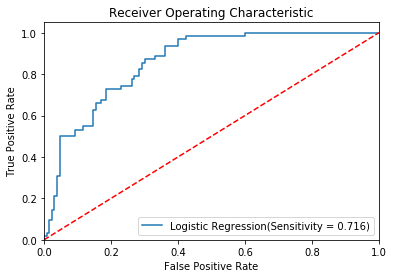

In [227]:
#Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression(Sensitivity = %0.3f)' % lr_roc_auc3)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

+ We can tune the threshold values to build a classifier model with more desired output for Logistic algorithm and other 
classifier models.
+ ROC curve assist to choose a threshold that balances sensitivity and specificity that makes sense of perspective for certain
conditions.
+ Increasing the threshold may decrease the sensitivity and increase the specificity. Therefore sensitivity is inversely 
proportional to the the specificity. There is always a trade-off between sensitivity and specificity.